In [1]:
# Importing libraries (all at once)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mstats  # Import mstats for winsorization
df1 = pd.read_csv(r"E:\5 Python\bank_marketing_updated_v1.csv")
df1.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11724\83947060.py:9: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r"E:\5 Python\bank_marketing_updated_v1.csv")


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


# Understanding the Dataset

In [2]:
df = pd.read_csv(r"E:\5 Python\bank_marketing_updated_v1.csv",skiprows = 2)
df.head()
# here I have use skip rows to skip first two rows, as you can see in above dataFrame, column name srart from third row

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


**From above outcomes we can see that some of our columns are skewed and there are some columns in which we have null values. Also the date is not datetime format.**

In [4]:
 df.isna().sum() # checking for total number of null values

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

**age-20, month-50, response-30 These are the null values of our data set**

In [5]:
print("\nNumber of Duplicate value :", df.duplicated().sum()) # checking duplicate values


Number of Duplicate value : 0


# Data imputation

In [6]:
# 1. Age : Impute missing values with the median Age   
median_Age  =df['age'].median()
df['age'].fillna(median_Age , inplace=True)

# 2. month: Impute missing values with the mode_month
mode_month = df['month'].mode()[0]
df['month'].fillna(mode_month, inplace=True)

# 3. response: Impute missing values with the mode_response
mode_response = df['response'].mode()[0]
df['response'].fillna(mode_response, inplace=True)

- To tackle null values of Age I have used median because this is a continuous variable and also right skewed. And median is robust against skewed data.
- To Impute missing values of month column I have used mode because this column carries string data, and mean, median will not work.
- To Impute missing values of response column i have used mode because it is categorical column and also contains strings in it.

In [7]:
df.isna().sum()  # chekcing whether the null values are handeled or not

customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
dtype: int64

# Feature engineering

In [8]:
# # Function to convert all duration values to minutes
def convert_to_minutes(duration):
    if 'sec' in duration:       
        seconds = float(duration.replace(' sec', '')) # Convert seconds to minutes
        return seconds / 60
    elif 'min' in duration:           
        return float(duration.replace(' min', ''))# Already in minutes
df['duration'] = df['duration'].apply(convert_to_minutes) # Apply the conversion function to the 'duration' column and overwrite it

**In duration column we have both data points with minutes as well as seconds so we can not interpret anything from it. so first I have converted all datapoints into minutes. Previously this column contains string data so it is showing Dtypes as object hence I have converted this column into Dtypes float.**

In [9]:
# creating two new columns for job and education by spliting column jobedu'
df[['Job', 'Education']] = df['jobedu'].str.split(',', expand=True)

# creating two new columns for month_name and year by spliting column month'
df[['Month_Name', 'Year']] = df['month'].str.split(',', expand=True)

**In jobedu column we have both data points with Job type and Education level combinely.So we can not interpret anything from it. So I have split this columns into two one with name Job and Education.
Similary I have split month column into Month_Name and Year so i can create date and convert its Dtypes into Datetime.**

In [10]:
# # Create a dictionary to map month names to numeric values
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['Month'] = df['Month_Name'].map(month_mapping)  # Map the Month column to numeric values

# Combine Year, Month_Num, and Day into a Date column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'day']])

**I have mapped every month with a number 1 to 12 then I have combine day, month and year into one column Date and the convert it into datetime format**

In [11]:
# Dropping columns in place
df.drop(columns=['jobedu', 'month'], inplace=True)

**Since I have split these two columns and extract every data from it so I am dropping it.**

In [12]:
# Create age groups
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 20, 30, 40, 50, 60, 100],
                         labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'],
                         right=False)  # right=False to include left edge

# Create balance categories
df['balance_category'] = pd.qcut(df['balance'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Create salary categories
df['salary_category'] = pd.qcut(df['salary'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Job', 'Education', 'marital', 'housing', 'loan','default','response']
for col in categorical_cols:
    df[f'{col}_encoded'] = le.fit_transform(df[col])
# # Encode 'response' as 1 (yes) and 0 (no)
# df['response_encoded'] = df['response'].apply(lambda x: 1 if x == 'yes' else 0)

**I have created categories of Age, Balance and salary. Because these variables are continuous and not easy to visualize. But after these categories it is easy to interpret from these columns.
 Also I have Encoded categorical variables so I can apply mathematical calculations and find correlation with targeted variabel (response).**

In [49]:
# # Finding all rows where a salary is Very High
# specific_rows = df[df['salary_category'] == 'Very High']
# specific_rows

#df.info() # just checking that every thing is right or not 

# Descriptive Statistics

In [50]:
df.describe() # checking Statistical description after data imputation and feature engineering

,customerid,age,salary,balance,day,duration,campaign,pdays,previous,Month,Date,Job_encoded,Education_encoded,marital_encoded,housing_encoded,loan_encoded,default_encoded,response_encoded
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.934795,57006.171065,1362.272058,15.806419,4.302718,2.763841,40.197828,0.580323,6.143571,2017-06-20 03:57:47.819778304,4.339762,1.224813,1.167725,0.555838,0.160226,0.018027,0.116941
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000,2017-01-06 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.716667,1.000000,-1.000000,0.000000,5.000000,2017-05-09 00:00:00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,6.000000,2017-06-04 00:00:00,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,5.316667,3.000000,-1.000000,0.000000,8.000000,2017-08-05 00:00:00,7.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,81.966667,63.000000,871.000000,275.000000,12.000000,2017-12-31 00:00:00,11.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000
std,13051.435847,10.616926,32085.718415,3044.765829,8.322476,4.292130,3.098021,100.128746,2.303441,2.407332,NaN,3.272657,0.747997,0.608230,0.496878,0.366820,0.133049,0.321353


In [51]:
#  measure of central tendency (of these specific columns that i want to check)
quant_variables = df[['age', 'salary', 'balance', 'day', 'duration','campaign','pdays','previous','Date']] # aggregating quantitative variables

mean = quant_variables.mean()
median = quant_variables.median()
mode = quant_variables.mode().iloc[0]  # iloc is  Getting the first mode for each column if there are multiple 

Measures_of_Central_Tendency = pd.DataFrame({       # combinig and storing all of them in single DataFrame
    'mean': mean,
    'median': median,
    'mode': mode
})
Measures_of_Central_Tendency = Measures_of_Central_Tendency.T  # .T is for transpose to get result horizontally
Measures_of_Central_Tendency

,age,salary,balance,day,duration,campaign,pdays,previous,Date
mean,40.934795,57006.171065,1362.272058,15.806419,4.302718,2.763841,40.197828,0.580323,2017-06-20 03:57:47.819778304
median,39.0,60000.0,448.0,16.0,3.0,2.0,-1.0,0.0,2017-06-04 00:00:00.000000000
mode,32.0,20000,0,20,1.5,1,-1,0,2017-05-15 00:00:00.000000000


**By compairing mean and median I can say all of these columns are right skewed, except for salary it left skewed.**

In [17]:
# measures of dispersion (of these specific columns that i want to check)
quant_variables = df[['age', 'salary', 'balance', 'day', 'duration','campaign','pdays','previous']]  # aggregating quantitative variables
variance = quant_variables.var()
std_dev = quant_variables.std()
data_range = quant_variables.max() - quant_variables.min() 
iqr = quant_variables.quantile(0.75) - quant_variables.quantile(0.25)

Measures_of_Dispersion = pd.DataFrame({   # combinig and storing all of them in single DataFrame
    'variance': variance,
    'std_dev': std_dev,
    'range': data_range,
    'IQR': iqr
})
Measures_of_Dispersion = Measures_of_Dispersion.T
Measures_of_Dispersion

,age,salary,balance,day,duration,campaign,pdays,previous
variance,112.719128,1.029493e+09,9.270599e+06,69.263609,18.422382,9.597733,10025.765774,5.305841
std_dev,10.616926,3.208572e+04,3.044766e+03,8.322476,4.292130,3.098021,100.128746,2.303441
range,77.000000,1.200000e+05,1.101460e+05,30.000000,81.966667,62.000000,872.000000,275.000000
IQR,15.000000,5.000000e+04,1.356000e+03,13.000000,3.600000,2.000000,0.000000,0.000000


**This shows substantial variability in the values of these features, as indicated by their high variance and standard deviation. The range and IQR (Interquartile Range) reveal that most features, particularly day and duration, have moderate spreads, but campaign and previous tend to have lower dispersion within the middle 50% of values, suggesting concentrated values.**

Response Distribution (%):
response
no     88.305943
yes    11.694057
Name: proportion, dtype: float64


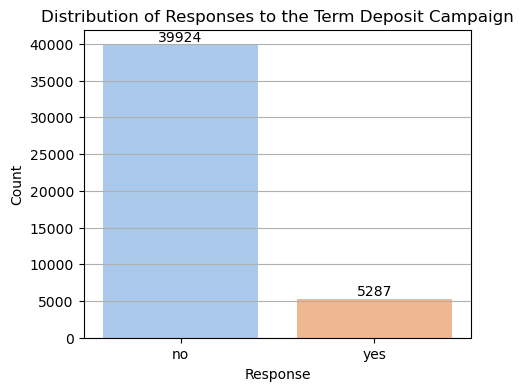

In [69]:
# distribution of the target variable, indicating responses to the term deposit campaign.

response_counts = df['response'].value_counts(normalize=True) * 100  # Calculate response rates in percentage
print("Response Distribution (%):")
print(response_counts)

#  Visualization
plt.figure(figsize=(5, 4))
A=sns.countplot(data=df, x='response', palette='pastel')
plt.title('Distribution of Responses to the Term Deposit Campaign')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
for i in A.containers:
    A.bar_label(i)  # to show number values at the end of the bar
plt.show()

**Findigs:-** here number of response no(39924) is  88.305943% of the data and yes(5287) is just 11.694057% of the data.
**Recommendation:-** apply root cause analysis to find out the reason and take action accordingly)**

# # Univariate Analysis for 'age'

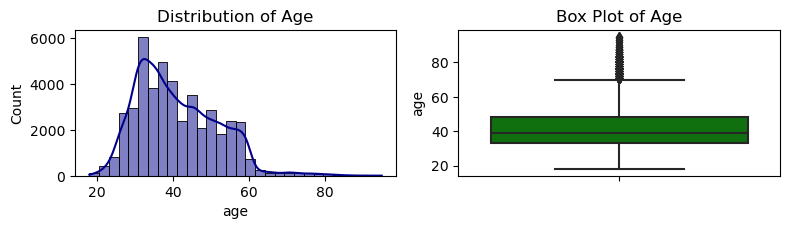

In [65]:
plt.figure(figsize=(8, 4))  # dimension of the graphs

plt.subplot(2, 2, 1)  # defining the position of the 1st graph 
sns.histplot(df['age'], bins=30, kde=True, color='darkblue') # Histogram for Age
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)   # defining the position of the 2nd graph
sns.boxplot(y=df['age'], color='green') # Box Plot for Age
plt.title('Box Plot of Age')
# plt.subplot(2, 1, 2)  # defining the position of the 3rd graph
# sns.kdeplot(df['age'], color='red', fill=True) # KDE Plot for Age
# plt.title('KDE of Age')

plt.tight_layout()
plt.show()

- **Findings:-** Age Distribution: The column is right-skewed distribution with most individuals aged between 20-50, peaking around 30-40.
Outliers: The box plot indicates several outliers above 60, with a few extending toward 80+, suggesting a smaller elderly population.
- **Recommendations:-** Address Outliers: If older age outliers are not relevant to the analysis, consider capping or transforming them.
Given the skewed distribution, analyze age groups separately to understand behavioral patterns across demographics.

# # Univariate Analysis for 'salary'

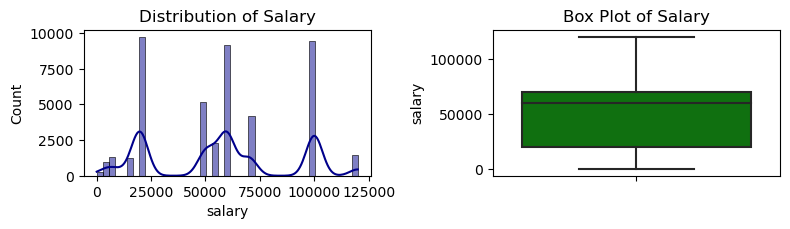

In [66]:
plt.figure(figsize=(8, 4))  # dimension of the graphs

plt.subplot(2, 2, 1)  # defining the position of the 1st graph 
sns.histplot(df['salary'],kde=True, color='darkblue') # Histogram for salary
plt.title('Distribution of Salary')

plt.subplot(2, 2, 2)   # defining the position of the 2nd graph
sns.boxplot(y=df['salary'], color='green') # Box Plot for salary
plt.title('Box Plot of Salary')

plt.tight_layout()
plt.show()

- **Findings:-** Salary Distribution: The column reveals a multimodal distribution with noticeable peaks at specific salary ranges, indicating possible salary bands or structured salary groups. The KDE plot shows similar peaks, reinforcing the idea of clustered salary groups rather than a smooth distribution.
Outliers and Range: The box plot suggests a broad range of salaries without extreme outliers, showing a relatively even spread across the range.
- **Recommendations:-** Investigate Salary Clusters why certain salary bands are more common

# Univariate Analysis for 'balance'

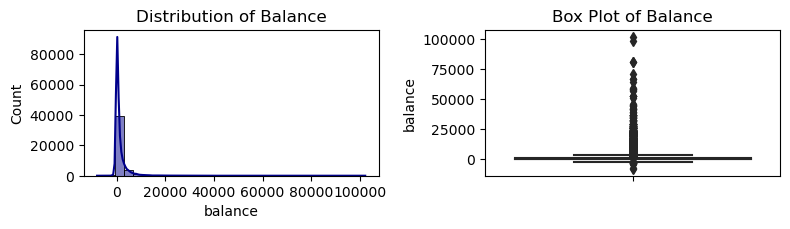

In [63]:
plt.figure(figsize=(8, 4)) # dimensions of graph

plt.subplot(2, 2, 1)  # showing the position of the 1st graph
sns.histplot(df['balance'], bins=30, kde=True, color='darkblue') # Histogram for Balance
plt.title('Distribution of Balance')

plt.subplot(2, 2, 2) # showing the position of the 2nd graph
sns.boxplot(y=df['balance'], color='green') # Box Plot for Balance
plt.title('Box Plot of Balance')

plt.tight_layout()
plt.show()

- **Findigns:-** The majority of balances are very low (close to 0),There are a few very high balances (outliers shown as dots in the box plot).It's heavily(right) skewed to the right (long tail).Means most people have small balances while few have very large ones
- **Recommendations:-** Consider creating different account tiers to better serve both low and high balance customers. Develop programs to encourage maintaining higher minimum balances

# Univariate Analysis for 'duration'

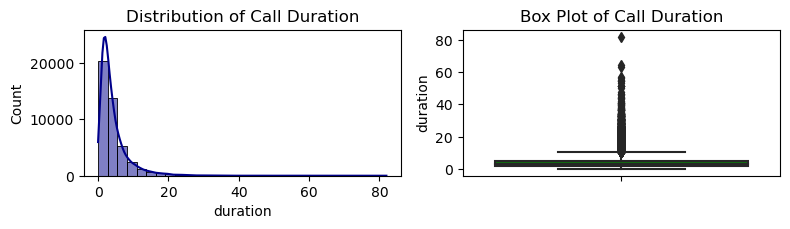

In [67]:
plt.figure(figsize=(8, 4)) # showing the dimesions of graphs

plt.subplot(2, 2, 1) # showing the position of the 1st graph
sns.histplot(df['duration'], bins=30, kde=True, color='darkblue') # Histogram for Duration
plt.title('Distribution of Call Duration')

plt.subplot(2, 2, 2) # showing the position of the 2nd graph
sns.boxplot(y=df['duration'], color='green') # Box Plot for Duration
plt.title('Box Plot of Call Duration')

plt.tight_layout() # to overcome overlapping
plt.show()

- **Findings:-** Call Duration Distribution: Most call durations are very short, clustered around 0-10 minutes, with only a few lasting longer.Customers who engage in longer conversations tend to convert more, suggesting that quality interactions matter.
Outliers: The box plot shows several outliers, where call durations exceed 20 minutes, although these are rare. The KDE plot confirms that call durations quickly drop off after a few minutes.
- **Recommendations:-** Examine the longer calls to see if they lead to different outcomes, like higher response rates.
Segmentation: Group data by short and long call durations to understand if duration affects customer behavior.


# Bivariate Analysis

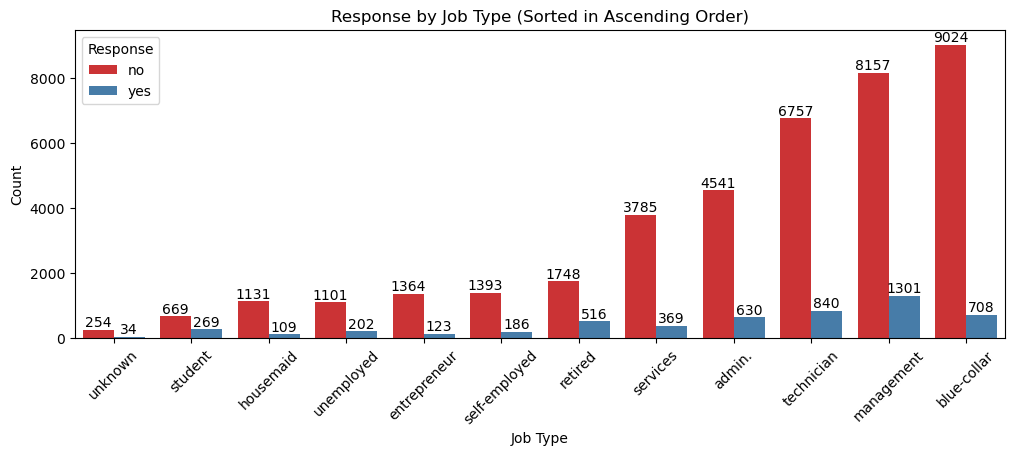


Count of Responses by Job :


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Job,admin.,admin.,blue-collar,blue-collar,entrepreneur,entrepreneur,housemaid,housemaid,management,management,...,services,services,student,student,technician,technician,unemployed,unemployed,unknown,unknown
response_encoded,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
Count,4541,630,9024,708,1364,123,1131,109,8157,1301,...,3785,369,669,269,6757,840,1101,202,254,34


In [23]:
# Analyzing Job and response relation

sorted_order = df['Job'].value_counts(ascending=True).index # Sorting the 'Job' categories by the count of responses in ascending order

plt.figure(figsize=(12, 4)) # visualization
A=sns.countplot(x='Job', hue='response', data=df, palette='Set1', order=sorted_order)
plt.title('Response by Job Type (Sorted in Ascending Order)')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response')
for i in A.containers:
    A.bar_label(i)  # to show number values at the end of the bar
plt.show()

# Count responses by Job
Job_response_counts = df.groupby(['Job', 'response_encoded']).size().reset_index(name='Count')
print("\nCount of Responses by Job :")
Job_response_counts.T

- **Findings:-** The blue-collar and management job types have the highest number of non-positive responses, with 9,024 blue-collar and 8,157 management individuals responding negatively. The number of positive responses is significantly lower, with 708 blue-collar and 1,301 management with highest positive responses.
- **Recommendation:-** Focus on Blue-Collar and Management Job Types:Since these two categories have the highest number of responses, increasing the conversion rate in these segments could have a significant impact. Further analysis into what drives non-positive responses within these categories (e.g., pricing, product relevance, or delivery methods) could lead to improved results.

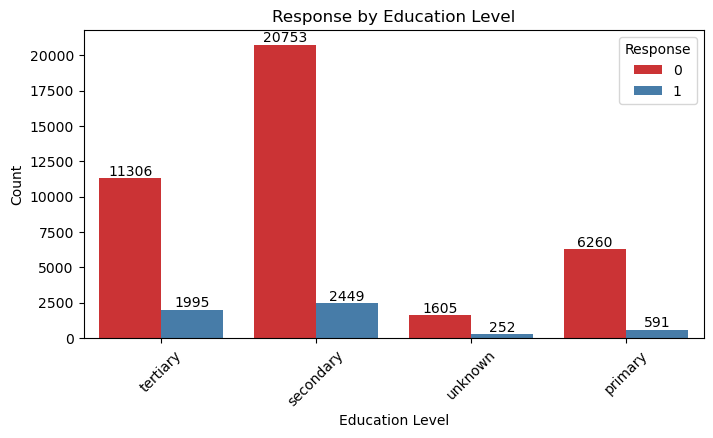

Count of Responses by Education:


,0,1,2,3,4,5,6,7
Education,primary,primary,secondary,secondary,tertiary,tertiary,unknown,unknown
response_encoded,0,1,0,1,0,1,0,1
Count,6260,591,20753,2449,11306,1995,1605,252


In [24]:
# # Bar plot to show the relationship between Education and response

# edu_response = pd.crosstab(df['Education'], df['response'], normalize='index')
# edu_response.plot(kind='bar',figsize=(10, 3), color=['skyblue', 'blue'])
# plt.title('Stacked Bar Chart of Response by Education Level')
# plt.xlabel('Education Level')
# plt.ylabel('Proportion')
# plt.xticks(rotation=0)
# plt.legend(title='Response')

# plt.show()

# Education and campaign success

plt.figure(figsize=(8, 4))
A=sns.countplot(x='Education', hue='response_encoded', data=df, palette='Set1')
plt.title('Response by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response')
for i in A.containers:
   A.bar_label(i)  # to show number values at the end of the bar
plt.show()

# Count responses by Education
education_response_counts = df.groupby(['Education', 'response_encoded']).size().reset_index(name='Count')
print("Count of Responses by Education:")
education_response_counts.T

- **Findings:-** Secondary Education Has the Highest Non-Positive Response Rate: with 20,753 negative and 2,449 positive responses.Tertiary education have a higher proportion of positive responses compared to other groups, with 11,306 non-positive and 1,995 positive responses.
- **Recommendation:-** Focus on the large secondary education group with practical, affordable campaigns to boost conversions. For tertiary-educated individuals, emphasize premium offerings with long-term benefits to leverage their higher engagement. Target primary education individuals with accessible, straightforward messaging to overcome potential barriers. For the unknown education group, enhance data collection or use broad, inclusive campaigns. Adapting to each group's needs can significantly increase response rates.

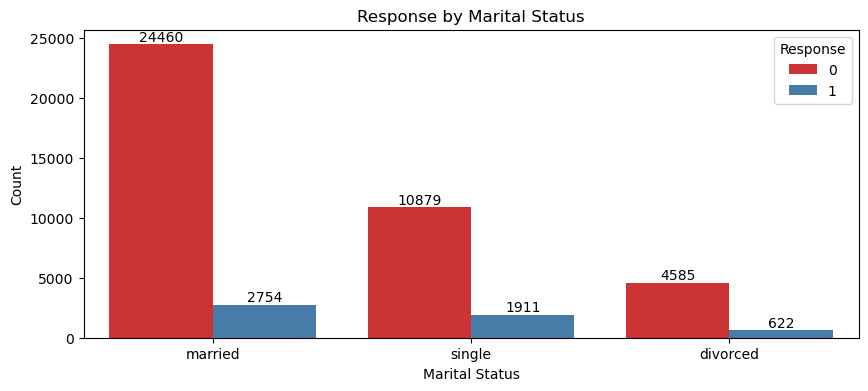


Count of Responses by Marital Status:


,0,1,2,3,4,5
marital,divorced,divorced,married,married,single,single
response_encoded,0,1,0,1,0,1
Count,4585,622,24460,2754,10879,1911


In [25]:
# Marital status and campaign success

plt.figure(figsize=(10, 4))
A=sns.countplot(x='marital', hue='response_encoded', data=df, palette='Set1')
plt.title('Response by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Response')
for i in A.containers:
    A.bar_label(i)  # to show number values at the end of the bar
plt.show()

# Count responses by Marital Status
marital_response_counts = df.groupby(['marital', 'response_encoded']).size().reset_index(name='Count')
print("\nCount of Responses by Marital Status:")
marital_response_counts.T

- **Findings:-** Married people form the largest group in the data, with about 24,460 'no' responses and 2,754 'yes' responses. Across all marital statuses (married, single, divorced), there are consistently more 'no' responses (shown in red) than 'yes' responses (shown in blue)
- **Recommendations:-** Focus marketing efforts especially on married customers since they're the largest group - create family-oriented products or services that might appeal to them better. Try to understand why there's such a low 'yes' response rate across all groups - maybe conduct customer surveys or focus groups to find out what would make people more likely to say 'yes', and adjust products or services accordingly

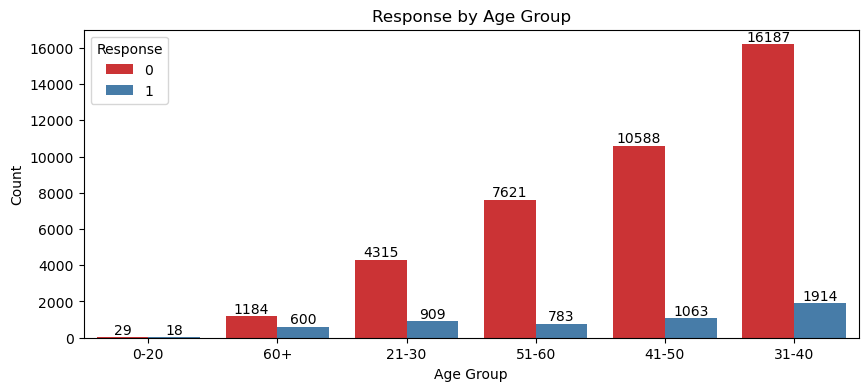

In [26]:
# Bar plot to show the relationship between age_group and response_encoded

sorted_order = df['age_group'].value_counts(ascending=True).index # sorting age group in ascendign order
plt.figure(figsize=(10,4))
A=sns.countplot(data=df, x='age_group', hue='response_encoded', palette='Set1',order=sorted_order)
plt.title('Response by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Response')
for i in A.containers:
    A.bar_label(i)  # to show number values at the end of the bar
plt.show()

- **Findings:-** Age Group 31-40: This group has the most people, with 16,187 not responding positively (0) and 1,914 responding positively (1). However, the number of positive responses is still low, indicating that this group is large but not very engaged.
Low Engagement in Age Groups 0-20 and 60+: These younger and older age groups have very few responses, which might be due to poor targeting or the current campaigns not being relevant to them.
- **Recommendations:-** Boost Conversion for Age 31-40: Create campaigns with personalized offers and incentives to attract this important group and increase their positive responses.
Target Age Groups 0-20 and 60+: Use fun and trendy content for younger audiences (0-20) and focus on building trust and keeping things simple for older audiences (60+) to increase their engagement.

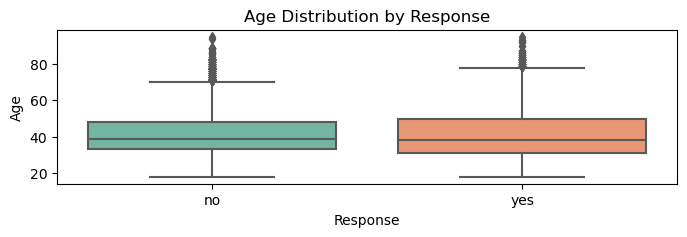

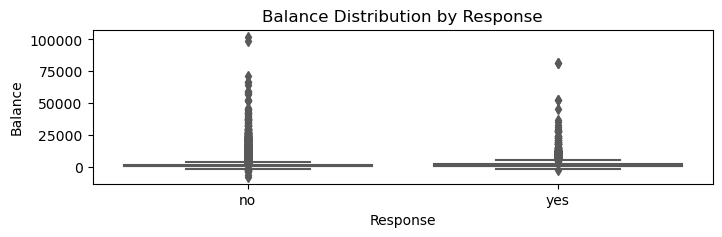

In [27]:
# checking for outliers in age column with respect to response

plt.figure(figsize=(8, 2))
sns.boxplot(x='response', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Response')
plt.xlabel('Response')
plt.ylabel('Age')
plt.show()

# checking for outliers in balance column with respect to response

plt.figure(figsize=(8, 2))
sns.boxplot(x='response', y='balance', data=df, palette='Set2')
plt.title('Balance Distribution by Response')
plt.xlabel('Response')
plt.ylabel('Balance')
plt.show()

Outliers in the age distribution are primarily on the higher end. A few older customers have significantly different behaviors compared to the rest of the population. .Most customers are middle-aged (35-45 years).Very uneven balance distribution.most have low balances with few high-value outliers

 # Categorical Variables Analysis
 **We have already analyzed some categorical varibales like job, education and marital sataus in bivariate analysis. So we will not do that again.**

In [28]:
df['Job'].value_counts()
# df['Education'].value_counts()
# df['default'].value_counts()
# df['housing'].value_counts()
# df['loan'].value_counts()
# df['poutcome'].value_counts()
# df['marital'].value_counts()

Job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

**Here I have written some codes to counts the distinct data points of these categorical data so we can run as par our requirement. Most of the analysis and visualization releated to these variables we have done above already.**

## Analying the affact of Loan, Housing_loan and Default_loan on campaign performance

In [29]:
# Count the responses based on housing loan status
housing_loan_response = df.groupby(['housing', 'response_encoded']).size().unstack(fill_value=0)

housing_loan_response.index = ['No Housing Loan', 'With Housing Loan']# Rename the index and columns for better clarity
housing_loan_response.columns = ['No Response', 'Yes Response']

total_responses = housing_loan_response.sum(axis=1)# Calculate the total responses for each housing loan status

# Calculate the percentage of positive responses
housing_loan_response['Positive Response %'] = (housing_loan_response['Yes Response'] / total_responses * 100).round(2)

print("\nCounts and Positive Response Percentage Based on Housing Loan Status:")
housing_loan_response


Counts and Positive Response Percentage Based on Housing Loan Status:


,No Response,Yes Response,Positive Response %
No Housing Loan,16728,3353,16.7
With Housing Loan,23196,1934,7.7


In [30]:
# Count the responses based on loan status
loan_response = df.groupby(['loan', 'response_encoded']).size().unstack(fill_value=0)

loan_response.index = ['No Loan', 'With Loan']# Rename the index and columns for better clarity
loan_response.columns = ['No Response', 'Yes Response']

total_responses_loan = loan_response.sum(axis=1)# Calculate the total responses for each loan status

# Calculate the percentage of positive responses
loan_response['Positive Response %'] = (loan_response['Yes Response'] / total_responses_loan * 100).round(2)

print("\nCounts and Positive Response Percentage Based on Loan Status:")
loan_response


Counts and Positive Response Percentage Based on Loan Status:


,No Response,Yes Response,Positive Response %
No Loan,33164,4803,12.65
With Loan,6760,484,6.68


In [31]:
# Count the responses based on default status
default_response = df.groupby(['default', 'response_encoded']).size().unstack(fill_value=0)

default_response.index = ['No Default Loan', 'With Default Loan'] #Rename the index and columns for better clarity
default_response.columns = ['No Response', 'Yes Response']

total_responses_default = default_response.sum(axis=1)#Calculate the total responses for each default status

#  Calculate the percentage of positive responses
default_response['Positive Response %'] = (default_response['Yes Response'] / total_responses_default * 100).round(2)

print("\nCounts and Positive Response Percentage Based on Default Status:")
default_response


Counts and Positive Response Percentage Based on Default Status:


,No Response,Yes Response,Positive Response %
No Default Loan,39161,5235,11.79
With Default Loan,763,52,6.38


#### Visualizing the affact of Loan, Housing_loan and Default_loan on campaign performance

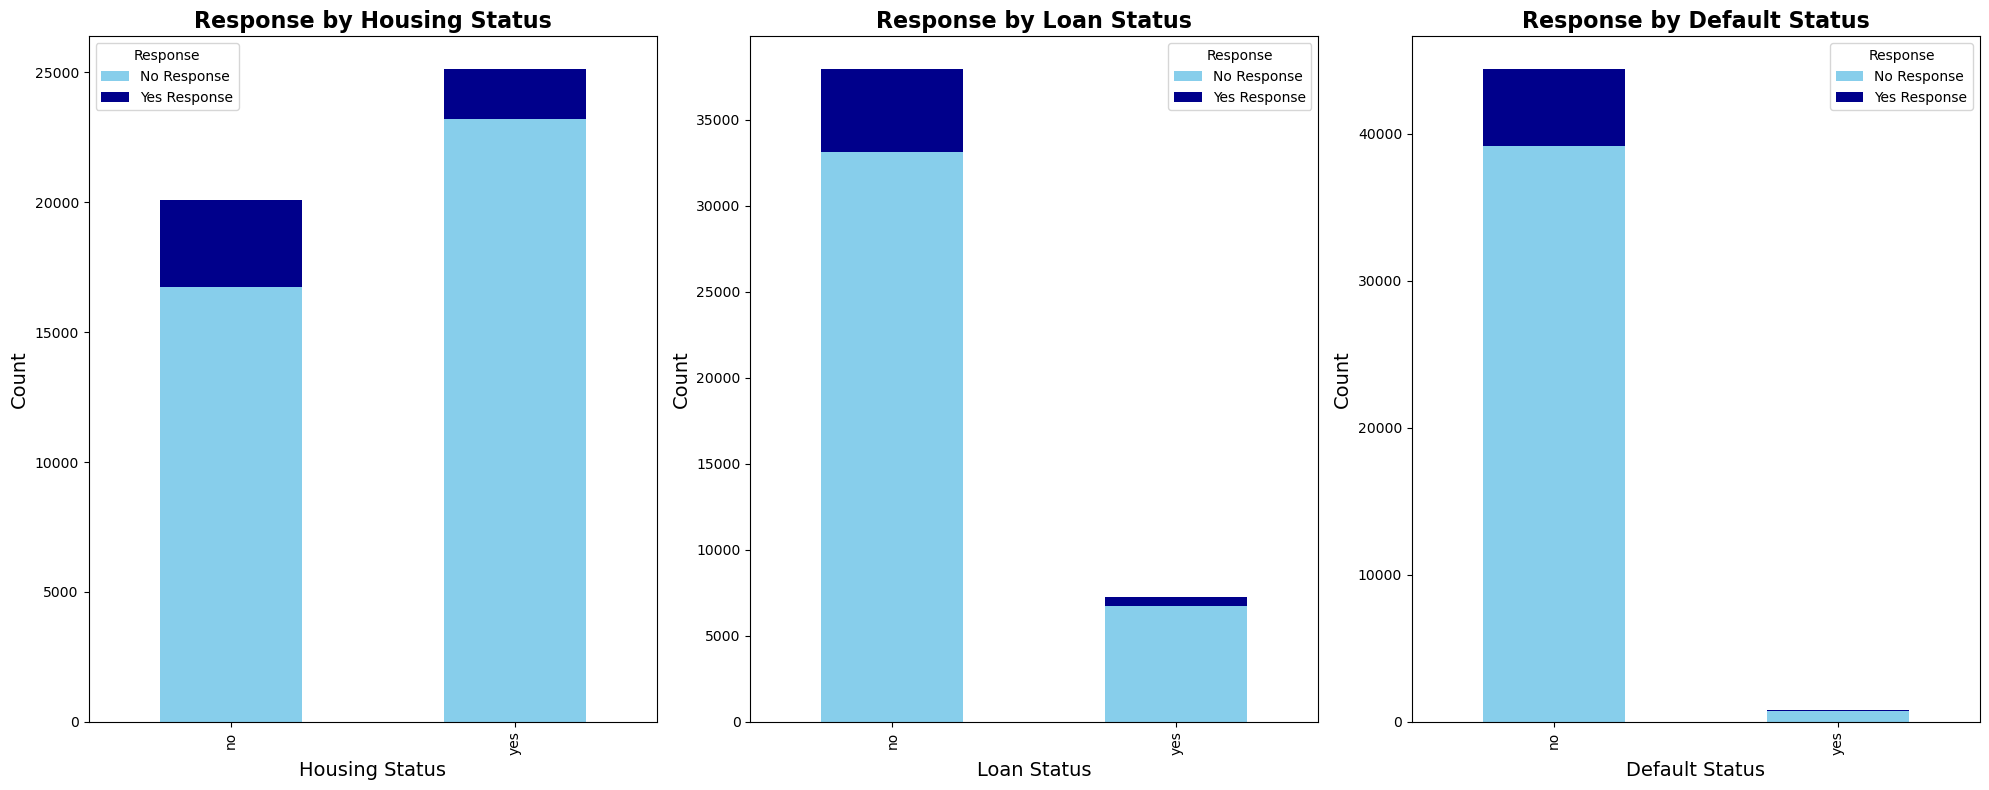

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8)) # Set up the figure and axes for subplots

# Housing response counts
housing_response = df.groupby(['housing', 'response_encoded']).size().unstack(fill_value=0)
housing_response.plot(kind='bar', stacked=True, ax=axes[0], color=['skyblue', 'darkblue'])
axes[0].set_title('Response by Housing Status', fontsize=16, fontweight='bold', color='black')
axes[0].set_xlabel('Housing Status', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].legend(title='Response', labels=['No Response', 'Yes Response'])

# Loan response counts
loan_response = df.groupby(['loan', 'response_encoded']).size().unstack(fill_value=0)
loan_response.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'darkblue'])
axes[1].set_title('Response by Loan Status', fontsize=16, fontweight='bold', color='black')
axes[1].set_xlabel('Loan Status', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].legend(title='Response', labels=['No Response', 'Yes Response'])

# Default loan response counts
default_response = df.groupby(['default', 'response_encoded']).size().unstack(fill_value=0)
default_response.plot(kind='bar', stacked=True, ax=axes[2], color=['skyblue', 'darkblue'])
axes[2].set_title('Response by Default Status', fontsize=16, fontweight='bold', color='black')
axes[2].set_xlabel('Default Status', fontsize=14)
axes[2].set_ylabel('Count', fontsize=14)
axes[2].legend(title='Response', labels=['No Response', 'Yes Response'])

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

- **Findings:-** The analysis of housing_loans and personal_loans shows that customers who do not have a loan are more likely to respond positively to the campaign.Customers with a history of default_loan are significantly less likely to respond positively.
- **Recommendation:-** Focus on customers who are debt-free or have fewer financial obligations, as they show a higher likelihood of interest in term deposits.Customers with a history of default should be excluded from future campaigns to improve cost-efficiency and reduce wasted efforts. 

# Temporal Analysis

In [33]:
# Count responses by month
monthly_responses = df.groupby(['Month_Name', 'response']).size().unstack(fill_value=0)
monthly_responses.T

Month_Name,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
response,,,,,,,,,,,,
no,2354,5552,114,2207,1260,6262,4791,229,12867,3565,415,308
yes,577,688,100,439,142,626,544,247,930,403,323,268


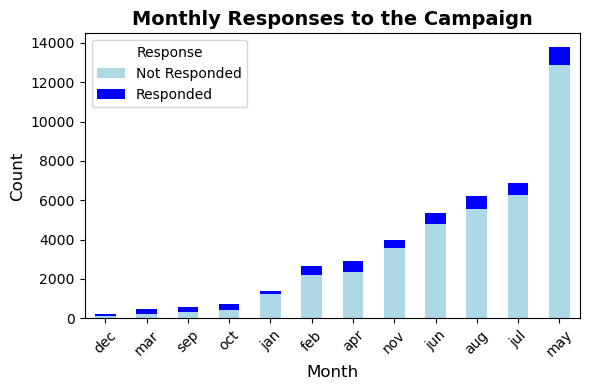

In [34]:
# Plot the monthly response counts
monthly_responses['Total'] = monthly_responses.sum(axis=1)
monthly_responses_sorted = monthly_responses.sort_values(by='Total', ascending=True).drop('Total', axis=1)
#A new column Total is created by summing across both "Not Responded" and "Responded" categories.
# then sorted by the Total column in ascending order.Total column is dropped after sorting

monthly_responses_sorted.plot(kind='bar', stacked=True, figsize=(6, 4), color=['lightblue', 'blue'])
plt.title('Monthly Responses to the Campaign', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Response', labels=['Not Responded', 'Responded'])
plt.tight_layout()
plt.show()

- **Findigs:-** The analysis of monthly responses shows distinct variations across months. May and August stand out as months with the highest number of positive responses, while March and December show significantly lower response rates.That means the campaign seems to perform best during the middle of the year, particularly in May and August
- **Recommendation:-** Campaigns performed best in May and August. These months should be prioritized for future telemarketing campaigns. In contrast, campaigns in March and December should be re-evaluated for their cost-effectiveness.

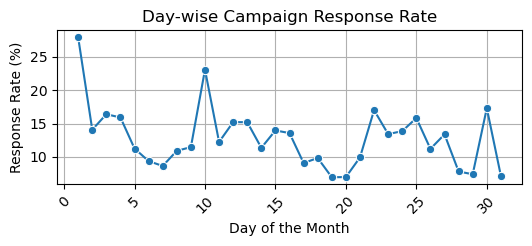

In [35]:
# Groupby day and calculate the response counts

day_response = df.groupby(['day', 'response']).size().unstack(fill_value=0)
# Calculate response rates
day_response['response_rate'] = (day_response['yes'] / (day_response['yes'] + day_response['no'])) * 100

plt.figure(figsize=(6, 2)) # Plotting the response rates by day
sns.lineplot(data=day_response, x=day_response.index, y='response_rate', marker='o')
plt.title('Day-wise Campaign Response Rate')
plt.xlabel('Day of the Month')
plt.ylabel('Response Rate (%)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid()
plt.show()

- **Findings:-** The response rate varies significantly throughout the month, with the highest peaks around day 1 (27%) and day 10 (22%).There's a noticeable pattern of lower response rates (around 8-10%) during the middle of the month (days 20-22)
- **Recommendations:-** Schedule more campaign activities during the start of the month (days 1-3) and around day 10, when people seem most responsive - this could improve overall campaign effectiveness. Consider reducing campaign spending during the middle of the month (days 20-22) when response rates are consistently lower, or investigate why responses drop during this period and develop strategies to improve them.

# Correlation Analysis
### correlation matrix of all numeric columns

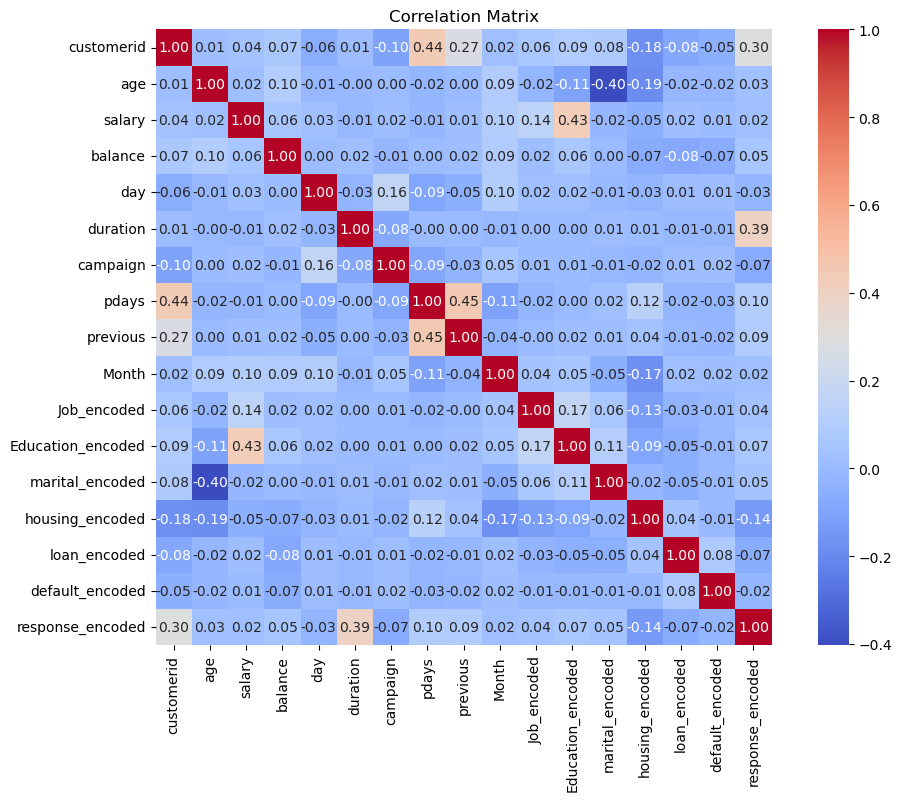

In [36]:
df_num = df.select_dtypes(include=['number']) # Creating a dataframe with only numeric columns

correlation_matrix = df_num.corr() #  Calculate the correlation matrix

plt.figure(figsize=(12, 8)) #  Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
#plt.xticks(rotation=45)
plt.show()

**Strong & Notable Relationships:**
- Education & Salary (0.43:-Higher education levels strongly link to higher salaries
- Age & Marital Status (-0.40):-Negative correlation means younger people are more likely to be single.Older customers tend to be married
- Duration & Response (0.39):-Longer calls/interactions lead to better response rates.Shows the importance of quality conversation time with customers.Suggests rushing calls might be counterproductive
- Previous Campaign & Payment Days (0.45):-Strong link between previous campaign contact and payment behavior.Could help in targeting repeat customers
- Age and Balance have a very slight positive correlation (0.098)
- Campaign and Duration show a slight negative correlation (-0.085)
- Most other correlations are close to zero, showing very weak relationships
- Balance and duration : customers with higher balances may spend more time during the call, potentially leading to a successful outcome.
- **Recommendations:-** We should create different financial products for different education/salary segments
- Allow for longer customer interactions
- Don't rush through sales calls
- Train staff to engage in longer, more meaningful discussions
- Use education level as a key factor in marketing strategy
- Consider salary levels when designing products
- Use payment history to time future campaign contacts

Correlation of independent variables with the target variable(response):
 response_encoded     1.000000
duration             0.394531
customerid           0.296158
pdays                0.103695
previous             0.093286
Education_encoded    0.066201
balance              0.052895
marital_encoded      0.045520
Job_encoded          0.040501
age                  0.025069
salary               0.020024
Month                0.018955
default_encoded     -0.022404
day                 -0.028265
loan_encoded        -0.068136
campaign            -0.073172
housing_encoded     -0.139180
Name: response_encoded, dtype: float64


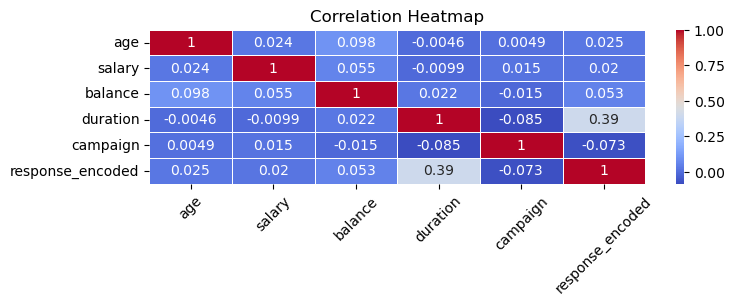

In [52]:
#  Correlation with the response
target_corr = correlation_matrix['response_encoded'].sort_values(ascending=False)
print("Correlation of independent variables with the target variable(response):\n", target_corr)
# Correlation matrix to check relation between specific features and response_encoded
corr_matrix = df[['age','salary', 'balance', 'duration', 'campaign', 'response_encoded']].corr()

# Heatmap
plt.figure(figsize=(8, 2))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

- **Findings:-** Strongest positive correlation -  Duration & Response (0.39):- Means longer interactions are more likely to get positive responses
- Very weak positive correlation - Balance & Response (0.053):- Higher account balances have a tiny tendency toward better responses
- Very weak positive correlation - Age & Response (0.025):- Age barely influences response rates
- Very weak positive correlation - Salary & Response (0.02):- Customer's salary has minimal impact on responses
- Weak negative correlation - Campaign & Response (-0.073):- More campaign contacts might slightly decrease positive responses

- **Recommendation:-**
- Focus primarily on the quality and duration of interactions
- Don't heavily weigh demographic factors (age, salary, balance) in targeting
- Create a balanced campaign contact strategy to avoid customer fatigue
- Train staff to engage in meaningful, longer conversations with customers

# Outlier Detection and Handling
## Detect outliers using the IQR method

In [39]:
Feature = ['age', 'salary', 'balance', 'duration', 'pdays', 'campaign', 'previous']  # Columns to check for outliers

def detect_outliers_iqr(df, columns):  # Function to detect outliers using the IQR method
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25) # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR  # Define lower and upper bounds for outliers
        upper_bound = Q3 + 1.5 * IQR
        
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers[col] = len(outlier_indices)
        
    return outliers

outlier_counts = detect_outliers_iqr(df, Feature) # Check for outliers using the IQR method
print("Outlier counts for each column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")
    
 ## ****************Detect outliers using Z-score**********************    
# Feature = ['age', 'salary', 'balance', 'duration','pdays','campaign','previous']#Selecting Columns to check for outliers

# def detect_outliers_zscore(df, columns):  # Function to detect outliers using Z-score
#     outliers = {}
#     for col in columns:
#         mean = df[col].mean()
#         std_dev = df[col].std()
        
#         # Calculate Z-scores
#         z_scores = (df[col] - mean) / std_dev
        
#         # Identify outliers (Z-score > 3 or < -3)
#         outlier_indices = df[(z_scores > 3) | (z_scores < -3)].index
#         outliers[col] = len(outlier_indices)
        
#     return outliers

# outlier_counts = detect_outliers_zscore(df, Feature) # Check for outliers
# print("Outlier counts for each column:")
# for col, count in outlier_counts.items():
#     print(f"{col}: {count} outliers")

Outlier counts for each column:
age: 487 outliers
salary: 0 outliers
balance: 4729 outliers
duration: 3247 outliers
pdays: 8257 outliers
campaign: 3064 outliers
previous: 8257 outliers


**previous - Previous column analysis indicated that the columns contain 582 outliers. However, we do not need to be concerned about these outliers, as they are not directly related to term deposits. Our ultimate goal is to increase revenue by conducting a cost-efficient telemarketing campaign for term deposits.
Similarly We can avoid pdays too because of same reason**

# Visualizing outliers of key features

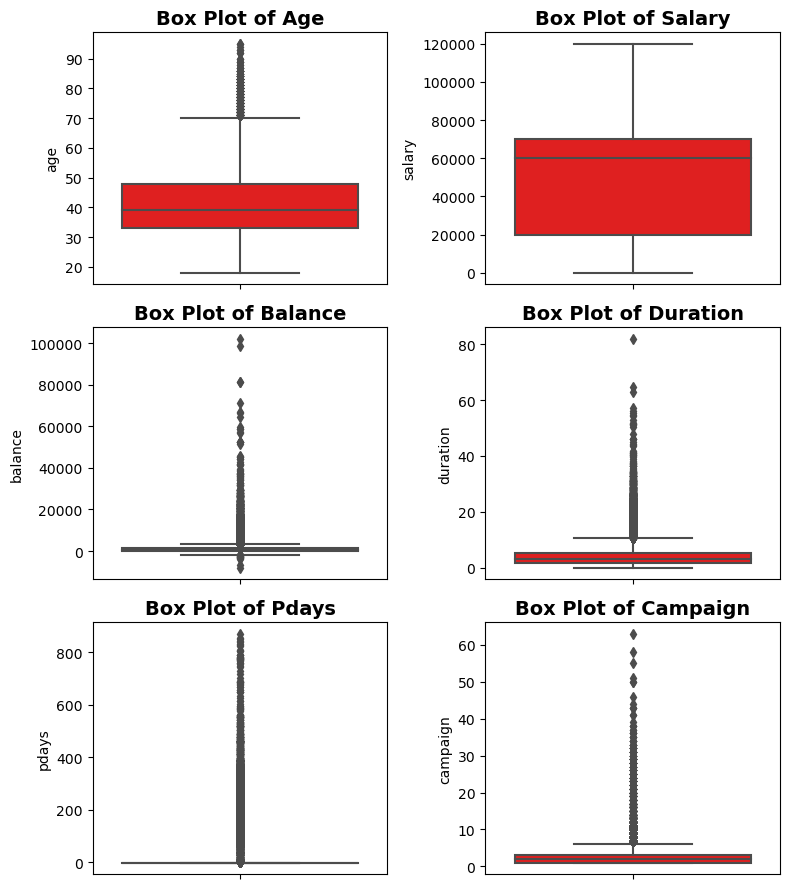

In [41]:
Features = ['age', 'salary', 'balance', 'duration', 'pdays', 'campaign'] # Define the key features we want to visualize

# Set up the figure and axes for subplots
num_columns = len(Features)
fig, axes = plt.subplots(num_columns // 2 + num_columns % 2, 2, figsize=(8, 3 * (num_columns // 2 + num_columns % 2)))

# Create box plots for the specified columns
sns.boxplot(data=df, y='age', ax=axes[0, 0], color='red')
axes[0, 0].set_title('Box Plot of Age', fontsize=14, fontweight='bold')

sns.boxplot(data=df, y='salary', ax=axes[0, 1], color='red')
axes[0, 1].set_title('Box Plot of Salary', fontsize=14, fontweight='bold')

if num_columns > 2:
    sns.boxplot(data=df, y='balance', ax=axes[1, 0], color='red')
    axes[1, 0].set_title('Box Plot of Balance', fontsize=14, fontweight='bold')

if num_columns > 3:
    sns.boxplot(data=df, y='duration', ax=axes[1, 1], color='red')
    axes[1, 1].set_title('Box Plot of Duration', fontsize=14, fontweight='bold')

if num_columns > 4:
    sns.boxplot(data=df, y='pdays', ax=axes[2, 0], color='red')
    axes[2, 0].set_title('Box Plot of Pdays', fontsize=14, fontweight='bold')

if num_columns > 5:
    sns.boxplot(data=df, y='campaign', ax=axes[2, 1], color='red')
    axes[2, 1].set_title('Box Plot of Campaign', fontsize=14, fontweight='bold')

plt.tight_layout() # Adjust layout to avoid overlap
plt.show()

- **Findings:-** Demographics & Financial -Outliers in the age distribution are primarily on the higher end. A few older customers have significantly different behaviors compared to the rest of the population. .Most customers are middle-aged (35-45 years).Wide salary range (20,000-120,000) with median around 40,000-50,000.Very uneven balance distribution.most have low balances with few high-value outliers
- Campaign Patterns:- Most campaign interactions are very short.Most customers receive 1-5 campaign contacts. Very few extended interactions (over 60 minutes)
 
- **Recommendations:-** Create different strategies for: Middle-aged majority (35-45 years),High-salary outliers (>100,000) and High-balance VIP customers.
- Consider segmenting the older customer base to understand if they behave differently or if these outliers can be targeted with specialized offers.
- Increase average interaction duration since most are very short
- Optimize number of campaign contacts (currently too few)
- Study successful long-duration calls to understand what makes them effective

## Handling the outliers

In [42]:
# # List of features to process
features = ['age', 'salary', 'balance', 'duration', 'pdays', 'campaign']

# Copy the original DataFrame to df_cleaned(so original data did not get affacted)
df_cleaned = df.copy()

In [43]:
# # 1. Cap and Floor Outliers (Winsorization)
# Applying winsorization for 5th and 95th percentiles to each feature individually
df_cleaned[features] = df_cleaned[features].apply(lambda x: mstats.winsorize(x, limits=[0.05, 0.05]))
#df_cleaned

In [44]:
# 2. Remove Outliers using IQR method
Q1 = df_cleaned[features].quantile(0.25)
Q3 = df_cleaned[features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only rows where data points fall within bounds across all features
df_cleaned = df_cleaned[((df_cleaned[features] >= lower_bound) & (df_cleaned[features] <= upper_bound)).all(axis=1)]
#df_cleaned

In [45]:
# # 3. Impute Outliers with Median
medians = df_cleaned[features].median()
# Impute outliers using the where method with axis defined
df_cleaned[features] = df_cleaned[features].where(
    (df_cleaned[features] >= lower_bound) & (df_cleaned[features] <= upper_bound), 
    other=medians,
    axis=0 )  # Specify that the operation should be done along columns

 **First I have created a duplicate dataframe so our original data did not get affacted.**
 1. First I have used winsorization - meaning it takes extreme values (top and bottom 5%) and brings them closer to the normal range, like trimming the edges
2. Then it removes any remaining outliers using the IQR (Interquartile Range) method - removing anything outside the IQR
3. Finally, for any remaining odd values, I replaces them with the median (middle value) of that feature.

## Visualizing the key features after handling outliers

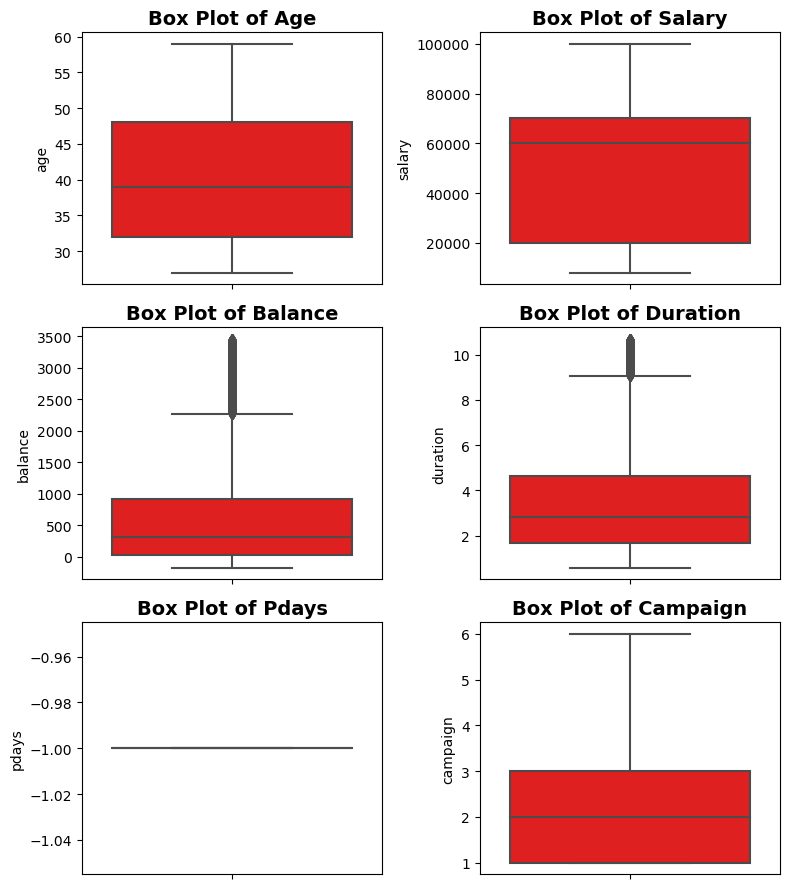

In [46]:
# Set up the figure and axes for subplots
num_columns = len(features)

# setting the position of the graphs
fig, axes = plt.subplots(num_columns // 2 + num_columns % 2, 2, figsize=(8, 3 * (num_columns // 2 + num_columns % 2)))

# Create box plots for the specified columns
sns.boxplot(data=df_cleaned, y='age', ax=axes[0, 0], color='red')
axes[0, 0].set_title('Box Plot of Age', fontsize=14, fontweight='bold')

sns.boxplot(data=df_cleaned, y='salary', ax=axes[0, 1], color='red')
axes[0, 1].set_title('Box Plot of Salary', fontsize=14, fontweight='bold')

if num_columns > 2:
    sns.boxplot(data=df_cleaned, y='balance', ax=axes[1, 0], color='red')
    axes[1, 0].set_title('Box Plot of Balance', fontsize=14, fontweight='bold')

if num_columns > 3:
    sns.boxplot(data=df_cleaned, y='duration', ax=axes[1, 1], color='red')
    axes[1, 1].set_title('Box Plot of Duration', fontsize=14, fontweight='bold')

if num_columns > 4:
    sns.boxplot(data=df_cleaned, y='pdays', ax=axes[2, 0], color='red')
    axes[2, 0].set_title('Box Plot of Pdays', fontsize=14, fontweight='bold')

if num_columns > 5:
    sns.boxplot(data=df_cleaned, y='campaign', ax=axes[2, 1], color='red')
    axes[2, 1].set_title('Box Plot of Campaign', fontsize=14, fontweight='bold')

plt.tight_layout() # Adjust layout to avoid overlap
plt.show()


**Before vs After Cleaning:**
1. Age: Before we had outliers up to 90+ years. After cleaning I have more concentrated between 30-50 years, extreme ages removed
2. Salary: Before salary showed extreme values up to 120,000. After cleaning more evenly distributed between 20,000-70,000
3. Balance: Before we had extreme outliers up to 100,000. After cleaning most values contained within 0-3,500 range
4. Duration: Before duration contains outliers up to 80 minutes. After cleaning most calls contained within 1-10 minutes
5. Campaign: Before campaign showed outliers up to 60 contacts. After cleaning more concentrated between 1-6 contacts

- **Main Impact:-** Data is now more concentrated around typical values. Extreme outliers have been removed or adjusted. Distribution is more balanced and representative of typical customers

### Checking the difference of size of DataFrame before and after Handling outliers

In [47]:
Original = df.shape
Cleaned = df_cleaned.shape
print("\nShape of the original DataFrame df :",Original)
print("\nShape of the Cleaned DataFrame df_cleaned:", Cleaned)


Shape of the original DataFrame df : (45211, 33)

Shape of the Cleaned DataFrame df_cleaned: (28411, 33)


After checking before and after cleaning I can say we have lost almost 37 % of our data so we should find other ways to tackle these outliers like Normalization or Standardization.